## Data Understanding

In [2]:
pd.set_option('max_colwidth', 150)

df = pd.read_csv("demonetization-tweets.csv",encoding = 'Windows-1252')

In [3]:
df.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow"">CPIMBadli</a>",CPIMBadli,120,True,False


In [4]:
df.shape

(14940, 16)

In [5]:
df = df['text']
df = pd.DataFrame({'tweet':df})

df.head()

,tweet
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…"
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F


## Cleaning the dataset

In [16]:
# Clean the tweets    
df['cleaned_tweet'] = df['tweet'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
df['cleaned_tweet'] = df['cleaned_tweet'].replace("  ", " ")

words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was","demonetization","demonetisation"]


def cleantext(df, words_to_remove = words_remove): 
    ### dont change the original tweet
    # remove emoticons form the tweets
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'<ed>','', regex = True)
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'\B<U+.*>|<U+.*>\B|<U+.*>','', regex = True)
    
    # convert tweets to lowercase
    df['cleaned_tweet'] = df['cleaned_tweet'].str.lower()
    
    #remove user mentions
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^(@\w+)',"", regex=True)            
            
        
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^(@\w+)',"", regex=True)
    
    #remove 'rt' in the beginning
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^(rt @)',"", regex=True)
    
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'[a-z]{14}',"", regex=True)
    
    #remove_symbols
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'[^a-zA-Z0-9]', " ", regex=True)

    #remove punctuations 
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)

    #remove_URL(x):
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'https.*$', "", regex = True)

    #remove 'amp' in the text
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'amp',"", regex = True)
    
    #remove words of length 1 or 2 
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)

    #remove extra spaces in the tweet
    df['cleaned_tweet'] = df['cleaned_tweet'].replace(r'^\s+|\s+$'," ", regex=True)
     
    
    #remove stopwords and words_to_remove
    stop_words = set(stopwords.words('english'))
    mystopwords = [stop_words, "via", words_to_remove]
    
    df['fully_cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in mystopwords]))
    

    return df

#get the processed tweets
df = cleantext(df)




def clean_data_round1(text):
    
    text = text.lower()    
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('https.*$','',text)
    text = re.sub('.*\:','',text)
    #text = re.sub('#[a-zA-Z]*','',text)
    return text


round1 = lambda x: clean_data_round1(x)

pd.set_option('max_colwidth', 250)

df['clean_tweet'] = df['tweet'].apply(round1)

df.head()

df['clean_tweet'] = df['clean_tweet'].replace(r'(@\w+)',"",regex=True)

df['clean_tweet'] = df['clean_tweet'].replace(r'(\#)',"",regex=True)

words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","afrom","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was","demonetization", "did", "it","it's", "lol", "way","did","you","on","if"]



from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS.union(words_remove)

df['fully_clean_tweets'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop_words]))
df['fully_clean_tweets'] = df['clean_tweet'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|\r|\"','',regex = True)




In [17]:
df.loc[:,'cleaned_tweet':]

,cleaned_tweet,fully_cleaned_tweet
0,rssurjewala critical question was paytm informed about edict its clearly fishy and requires full disclosure,rssurjewala critical question was paytm informed about edict its clearly fishy and requires full disclosure
1,hemant 80 did you vote modi survey app,hemant 80 did you vote modi survey app
2,roshankar former finsec rbi governor cbdt chair harvard professor lambaste not for aam aadmi listen,roshankar former finsec rbi governor cbdt chair harvard professor lambaste not for aam aadmi listen
3,ani news gurugram haryana post office employees provide cash exchange patients hospitals,ani news gurugram haryana post office employees provide cash exchange patients hospitals
4,satishacharya reddy wedding mail today cartoon reddywedding,satishacharya reddy wedding mail today cartoon reddywedding
...,...,...
14935,ghost returns with reports cash crunch across the country,ghost returns with reports cash crunch across the country
14936,modi fansd true nationalists the country stil think bst way 2 curb black mony fake,modi fansd true nationalists the country stil think bst way 2 curb black mony fake
14937,bharat builder lol has fixed lot like stone pelters corruption black money join crunch global warming racism,bharat builder lol has fixed lot like stone pelters corruption black money join crunch global warming racism
14938,stupidosaur vidyut team bjp cia baby cctv evm but with vvpat support surgical strikes jnu drama timepass demonetizati,stupidosaur vidyut team bjp cia baby cctv evm but with vvpat support surgical strikes jnu drama timepass demonetizati


In [18]:
# Sentiment calculation

from textblob import TextBlob

df['sentiment'] = df['fully_cleaned_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [19]:
df

,tweet,cleaned_tweet,fully_cleaned_tweet,sentiment
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,rssurjewala critical question was paytm informed about edict its clearly fishy and requires full disclosure,rssurjewala critical question was paytm informed about edict its clearly fishy and requires full disclosure,0.150000
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,hemant 80 did you vote modi survey app,hemant 80 did you vote modi survey app,0.000000
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…",roshankar former finsec rbi governor cbdt chair harvard professor lambaste not for aam aadmi listen,roshankar former finsec rbi governor cbdt chair harvard professor lambaste not for aam aadmi listen,0.000000
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,ani news gurugram haryana post office employees provide cash exchange patients hospitals,ani news gurugram haryana post office employees provide cash exchange patients hospitals,0.000000
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,satishacharya reddy wedding mail today cartoon reddywedding,satishacharya reddy wedding mail today cartoon reddywedding,0.000000
...,...,...,...,...
14935,RT @saxenavishakha: Ghost of demonetization returns with reports of cash crunch across the country https://t.co/kQsBesTIUs,ghost returns with reports cash crunch across the country,ghost returns with reports cash crunch across the country,0.000000
14936,N d modi fans-d true nationalists of the country stil think demonetization ws d bst way 2 curb black mony n fake no… https://t.co/9mgMEFu2sl,modi fansd true nationalists the country stil think bst way 2 curb black mony fake,modi fansd true nationalists the country stil think bst way 2 curb black mony fake,-0.105556
14937,"RT @bharat_builder: Lol. Demonetization has fixed a lot, like stone pelters, corruption, black money, join crunch, global warming, racism,…",bharat builder lol has fixed lot like stone pelters corruption black money join crunch global warming racism,bharat builder lol has fixed lot like stone pelters corruption black money join crunch global warming racism,0.183333
14938,"RT @Stupidosaur: @Vidyut B team of BJP. CIA baby. CCTV, EVM but with VVPAT, support 'surgical strikes', JNU drama, timepass in demonetizati…",stupidosaur vidyut team bjp cia baby cctv evm but with vvpat support surgical strikes jnu drama timepass demonetizati,stupidosaur vidyut team bjp cia baby cctv evm but with vvpat support surgical strikes jnu drama timepass demonetizati,0.000000


In [20]:
# Apply data cleaning round3

tweet_tokenizer = TweetTokenizer()
lemma = WordNetLemmatizer()

final_df = {}

for i,j in enumerate(df['fully_cleaned_tweet']):
    final_df[i] = tweet_tokenizer.tokenize(j)
    
final_df = {key: [i for i in value if len(i) > 2] for (key,value) in final_df.items()}    
final_df = {key:[t for t in value if t not in stopwords.words('english')] for (key,value) in final_df.items()}
final_df = {key:[lemma.lemmatize(t) for t in value] for (key,value) in final_df.items()}


In [21]:
data_cleaned = {key: [' '.join(value)] for (key,value) in final_df.items()}
data_cleaned = pd.DataFrame(data_cleaned.values())
data_cleaned

,0
0,rssurjewala critical question paytm informed edict clearly fishy requires full disclosure
1,hemant vote modi survey app
2,roshankar former finsec rbi governor cbdt chair harvard professor lambaste aam aadmi listen
3,ani news gurugram haryana post office employee provide cash exchange patient hospital
4,satishacharya reddy wedding mail today cartoon reddywedding
...,...
14935,ghost return report cash crunch across country
14936,modi fansd true nationalist country stil think bst way curb black mony fake
14937,bharat builder lol fixed lot like stone pelter corruption black money join crunch global warming racism
14938,stupidosaur vidyut team bjp cia baby cctv evm vvpat support surgical strike jnu drama timepass demonetizati


In [22]:
df = pd.concat([df,data_cleaned[0].apply(lambda x: tweet_tokenizer.tokenize(x))],axis = 1)

In [23]:
df.columns = ['tweet', 'cleaned_tweet', 'fully_cleaned_tweet', 'sentiment', 'tokenized_tweet']

In [24]:
df.loc[6878,'tokenized_tweet']

['dipendradipzo',
 'effect',
 'come',
 'another',
 'batch',
 'maoist',
 'keep',
 'watching',
 'come',
 'nomoneyyaar']

In [25]:
df.loc[5,'tokenized_tweet']

['india', 'blackmoney', 'symptom', 'disease']

In [26]:
df.head(6)

,tweet,cleaned_tweet,fully_cleaned_tweet,sentiment,tokenized_tweet
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,rssurjewala critical question was paytm informed about edict its clearly fishy and requires full disclosure,rssurjewala critical question was paytm informed about edict its clearly fishy and requires full disclosure,0.15,"[rssurjewala, critical, question, paytm, informed, edict, clearly, fishy, requires, full, disclosure]"
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,hemant 80 did you vote modi survey app,hemant 80 did you vote modi survey app,0.00,"[hemant, vote, modi, survey, app]"
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…",roshankar former finsec rbi governor cbdt chair harvard professor lambaste not for aam aadmi listen,roshankar former finsec rbi governor cbdt chair harvard professor lambaste not for aam aadmi listen,0.00,"[roshankar, former, finsec, rbi, governor, cbdt, chair, harvard, professor, lambaste, aam, aadmi, listen]"
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,ani news gurugram haryana post office employees provide cash exchange patients hospitals,ani news gurugram haryana post office employees provide cash exchange patients hospitals,0.00,"[ani, news, gurugram, haryana, post, office, employee, provide, cash, exchange, patient, hospital]"
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,satishacharya reddy wedding mail today cartoon reddywedding,satishacharya reddy wedding mail today cartoon reddywedding,0.00,"[satishacharya, reddy, wedding, mail, today, cartoon, reddywedding]"
5,"@DerekScissors1: India’s #demonetization: #Blackmoney a symptom, not the disease https://t.co/HSl6Ihj0Qe via @ambazaarmag",india blackmoney symptom not the disease,india blackmoney symptom not the disease,0.00,"[india, blackmoney, symptom, disease]"


In [27]:
df.loc[9997,'tokenized_tweet']

['dear',
 'evanspiegel',
 'india',
 'rich',
 'narendra',
 'modi',
 'implement',
 'find',
 'actually']

In [28]:
df['tokenized_tweet'] = df['tokenized_tweet'].apply(lambda x: [y for y in x if not any(c.isdigit() for c in y)])

In [29]:
df

,tweet,cleaned_tweet,fully_cleaned_tweet,sentiment,tokenized_tweet
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,rssurjewala critical question was paytm informed about edict its clearly fishy and requires full disclosure,rssurjewala critical question was paytm informed about edict its clearly fishy and requires full disclosure,0.150000,"[rssurjewala, critical, question, paytm, informed, edict, clearly, fishy, requires, full, disclosure]"
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,hemant 80 did you vote modi survey app,hemant 80 did you vote modi survey app,0.000000,"[hemant, vote, modi, survey, app]"
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th…",roshankar former finsec rbi governor cbdt chair harvard professor lambaste not for aam aadmi listen,roshankar former finsec rbi governor cbdt chair harvard professor lambaste not for aam aadmi listen,0.000000,"[roshankar, former, finsec, rbi, governor, cbdt, chair, harvard, professor, lambaste, aam, aadmi, listen]"
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,ani news gurugram haryana post office employees provide cash exchange patients hospitals,ani news gurugram haryana post office employees provide cash exchange patients hospitals,0.000000,"[ani, news, gurugram, haryana, post, office, employee, provide, cash, exchange, patient, hospital]"
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,satishacharya reddy wedding mail today cartoon reddywedding,satishacharya reddy wedding mail today cartoon reddywedding,0.000000,"[satishacharya, reddy, wedding, mail, today, cartoon, reddywedding]"
...,...,...,...,...,...
14935,RT @saxenavishakha: Ghost of demonetization returns with reports of cash crunch across the country https://t.co/kQsBesTIUs,ghost returns with reports cash crunch across the country,ghost returns with reports cash crunch across the country,0.000000,"[ghost, return, report, cash, crunch, across, country]"
14936,N d modi fans-d true nationalists of the country stil think demonetization ws d bst way 2 curb black mony n fake no… https://t.co/9mgMEFu2sl,modi fansd true nationalists the country stil think bst way 2 curb black mony fake,modi fansd true nationalists the country stil think bst way 2 curb black mony fake,-0.105556,"[modi, fansd, true, nationalist, country, stil, think, bst, way, curb, black, mony, fake]"
14937,"RT @bharat_builder: Lol. Demonetization has fixed a lot, like stone pelters, corruption, black money, join crunch, global warming, racism,…",bharat builder lol has fixed lot like stone pelters corruption black money join crunch global warming racism,bharat builder lol has fixed lot like stone pelters corruption black money join crunch global warming racism,0.183333,"[bharat, builder, lol, fixed, lot, like, stone, pelter, corruption, black, money, join, crunch, global, warming, racism]"
14938,"RT @Stupidosaur: @Vidyut B team of BJP. CIA baby. CCTV, EVM but with VVPAT, support 'surgical strikes', JNU drama, timepass in demonetizati…",stupidosaur vidyut team bjp cia baby cctv evm but with vvpat support surgical strikes jnu drama timepass demonetizati,stupidosaur vidyut team bjp cia baby cctv evm but with vvpat support surgical strikes jnu drama timepass demonetizati,0.000000,"[stupidosaur, vidyut, team, bjp, cia, baby, cctv, evm, vvpat, support, surgical, strike, jnu, drama, timepass, demonetizati]"


In [30]:
# Set value for various parameters

num_features = 200    # Word vector dimensionality                      
min_word_count = 1   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    

In [31]:
# Initialize and train the model 

from gensim.models import word2vec

print("Training model.....")

model = word2vec.Word2Vec(df['tokenized_tweet'], workers = num_workers, size = num_features, min_count = min_word_count, window = context)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

Training model.....


In [32]:
# Taking an average of all/total word vectors

vocabulary = list(model.wv.vocab)

def sentence_vector(sentence, model):
    nwords = 0
    featurev = np.zeros(200, dtype = "float32")
    for word in sentence:
        if word not in vocabulary:
            continue
        featurev = np.add(featurev, model[word])
        nwords = nwords + 1
    if nwords > 0:
        featurev = np.divide(featurev, nwords)    # Avearge
    return featurev

tweet_vector = df['tokenized_tweet'].apply(lambda x: sentence_vector(x, model))

tweet_vector = tweet_vector.apply(pd.Series)

In [33]:
# Normalizing

for x in range(len(tweet_vector)):
    x_min = tweet_vector.iloc[x].min()
    x_max = tweet_vector.iloc[x].max()
    X = tweet_vector.iloc[x]
    i = 0
    if (x_max - x_min) == 0:
        for y in X:
            tweet_vector.iloc[x][i] = (1/len(tweet_vector.iloc[x]))
            i += 1
    else:
        for y in X:
            tweet_vector.iloc[x][i] = ((y-x_min)/(x_max - x_min))
            i += 1

## Scale the sentiment

In [34]:
# Sentiment varies from '-1' to '+1'

def sentiment_scale(x):
    if x < 0.02:
        return -1
    elif x > 0.02:
        return 1
    else:
        return 0
    
    

In [35]:
tweet_vector[200] = df['sentiment'].apply(lambda x: sentiment_scale(x))

In [36]:
tweet_vector

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.469887,0.380007,0.837662,0.214978,0.590058,0.232306,0.624098,0.800620,0.189681,0.860948,...,0.360170,0.728793,0.530617,0.685926,0.544501,0.772273,0.625076,0.625003,0.844490,1
1,0.325008,0.237455,0.845748,0.236687,0.563119,0.606286,0.479480,0.760563,0.512879,0.730609,...,0.577877,0.624010,0.502643,0.727371,0.536815,0.666105,0.611619,0.694737,0.485033,-1
2,0.579798,0.333156,0.817072,0.425065,0.588356,0.652669,0.505379,0.846052,0.345582,0.804295,...,0.681305,0.744385,0.438083,0.869020,0.647612,0.734882,0.717515,0.810521,0.680231,-1
3,0.611462,0.382278,0.748222,0.469238,0.558684,0.626619,0.466037,0.841157,0.293151,0.789181,...,0.649204,0.767031,0.448001,0.877373,0.672183,0.717663,0.712881,0.771989,0.693383,-1
4,0.518794,0.271648,0.884246,0.440363,0.540318,0.430667,0.490634,0.755385,0.295689,0.761431,...,0.268610,0.606325,0.439655,0.915486,0.637254,0.657952,0.728533,0.494194,0.502654,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,0.578509,0.377737,0.852440,0.514004,0.528003,0.641571,0.420554,0.888631,0.233700,0.696923,...,0.478308,0.855978,0.607431,0.891804,0.687848,0.735070,0.719693,0.652130,0.651925,-1
14936,0.611937,0.290983,0.748001,0.496187,0.568816,0.670056,0.380258,0.753226,0.283437,0.707261,...,0.603519,0.683852,0.354068,0.917372,0.629176,0.683758,0.675764,0.736101,0.591465,-1
14937,0.580775,0.285160,0.743671,0.420304,0.472418,0.676171,0.415709,0.777813,0.120938,0.585728,...,0.695394,0.782300,0.380249,0.730235,0.503579,0.669203,0.582243,0.795267,0.687885,1
14938,0.549148,0.326082,0.805109,0.349689,0.537639,0.588398,0.508299,0.832419,0.279182,0.752649,...,0.655326,0.745627,0.430265,0.788647,0.601260,0.693042,0.644653,0.775645,0.673381,-1


In [37]:
df['sentiment'] = tweet_vector[200]

## Cluster the Narratives[opinions + expressions]

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

n_clusters = [30,40,50,60,70,80]

X = tweet_vector

best_clusters = 0
silhouette_best = 0
for n in n_clusters:
    
    cluster = KMeans(n_clusters = n, random_state = 40)
    cluster_labels = cluster.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print("For n_clusters =", n,"The average silhouette score is :", silhouette_avg)
    
    if silhouette_avg > silhouette_best:
        silhouette_best = silhouette_avg
        best_clusters = n          

For n_clusters = 30 The average silhouette score is : 0.4152498459032458
For n_clusters = 40 The average silhouette score is : 0.4285573710489477
For n_clusters = 50 The average silhouette score is : 0.43641379294728855
For n_clusters = 60 The average silhouette score is : 0.4627501597807085
For n_clusters = 70 The average silhouette score is : 0.47661497942483144
For n_clusters = 80 The average silhouette score is : 0.4994855947010412


In [39]:
best_clusters

80

In [40]:
df['cluster_label'] = cluster_labels

In [41]:
df.columns

Index(['tweet', 'cleaned_tweet', 'fully_cleaned_tweet', 'sentiment',
       'tokenized_tweet', 'cluster_label'],
      dtype='object')

In [42]:
df_ordered = pd.DataFrame(df)

df_ordered['tokenized_tweet'] = df_ordered['tokenized_tweet'].apply(tuple)

df_unique = df_ordered.groupby(['tweet', 'cleaned_tweet', 'fully_cleaned_tweet', 'sentiment','tokenized_tweet','cluster_label']).size().reset_index(name = 'frequency')

df_unique = df_unique.sort_values(by = ['cluster_label'])

df_unique['tokenized_tweet'] = df_unique['tokenized_tweet'].apply(list)

df_ordered['tokenized_tweet'] = df_ordered['tokenized_tweet'].apply(list)

In [43]:
df_unique.shape

(5147, 7)

In [44]:
df.shape

(14940, 6)

In [45]:
df_unique

,tweet,cleaned_tweet,fully_cleaned_tweet,sentiment,tokenized_tweet,cluster_label,frequency
1593,@timesofindia Stone pelting and inflow of fake currency started again. From cash less to less cash. Moto of demonetization has changed,stone pelting and inflow fake currency started again from cash less less cash moto has changed,stone pelting and inflow fake currency started again from cash less less cash moto has changed,-1,"[stone, pelting, inflow, fake, currency, started, cash, le, le, cash, moto, changed]",0,1
3804,RT @coolfunnytshirt: Delhiites least affected by #demonetization &amp; long queues at ATMs. They are doing online transactions with free wi-fi…,delhiites least affected long queues atms they are doing online transactions with free wifi,delhiites least affected long queues atms they are doing online transactions with free wifi,-1,"[delhiites, least, affected, long, queue, atm, online, transaction, free, wifi]",0,6
3791,RT @centerofright: #DeMonetization - the new 500 notes are not yet coming out of majority of the recalibrated ATMs. Ppl who had small amoun…,centerofright the new 500 notes are not yet coming out majority the recalibrated atms ppl who had small amoun,centerofright the new 500 notes are not yet coming out majority the recalibrated atms ppl who had small amoun,-1,"[centerofright, new, note, yet, coming, majority, recalibrated, atm, ppl, small, amoun]",0,11
3790,RT @centerofright: #DeMonetization - ppl who hv hoarded the cash are still to start depositing in bank accts - Guess they expect an extn or…,centerofright ppl who hoarded the cash are still start depositing bank accts guess they expect extn,centerofright ppl who hoarded the cash are still start depositing bank accts guess they expect extn,-1,"[centerofright, ppl, hoarded, cash, still, start, depositing, bank, accts, guess, expect, extn]",0,11
3784,RT @centerofright: #DeMonetization - Some thoughts - 2 weeks over after that 8.00 PM speech. Lines hv reduced at banks for exchange. ATMs h…,centerofright some thoughts 2 weeks over after that 800 speech lines reduced banks for exchange atms,centerofright some thoughts 2 weeks over after that 800 speech lines reduced banks for exchange atms,-1,"[centerofright, thought, week, speech, line, reduced, bank, exchange, atm]",0,32
...,...,...,...,...,...,...,...
2600,India’s “parallel” economy under attack with #demonetization\r\nKnow more: https://t.co/2W8EJlnd93\r\n#currency #liquidity https://t.co/iaX4MMZV2R,india parallel economy under attack with know more,india parallel economy under attack with know more,1,"[india, parallel, economy, attack, know]",79,1
4015,RT @mostlyeconomics: Did India get the idea for its recent demonetization by watching old episodes of M*A*S*H? https://t.co/hlbME0xyDR,did india get the idea for its recent watching old episodes,did india get the idea for its recent watching old episodes,1,"[india, get, idea, recent, watching, old, episode]",79,1
4359,"Retweeted DNA (@dna):\r\n\r\n#Demonetization: 82,500 ATMs re-calibrated to dispense new notes https://t.co/5RacGMqzpd https://t.co/l8m9CYfUOl",retweeted dna dna 82500 atms recalibrated dispense new notes,retweeted dna dna 82500 atms recalibrated dispense new notes,1,"[retweeted, dna, dna, atm, recalibrated, dispense, new, note]",79,1
1207,"@dna If inquiry post Demonetization moves on fast track,many joining hands today, may not be eligible to contest in 2019.",inquiry post moves fast trackmany joining hands today may not eligible contest 2019,inquiry post moves fast trackmany joining hands today may not eligible contest 2019,1,"[inquiry, post, move, fast, trackmany, joining, hand, today, may, eligible, contest]",79,1


### Discard poor silhouette scores clusters

In [46]:
sample_slhouette_score = silhouette_samples(X, cluster_labels)

avg_cluster_sil_score = []
poor_cluster_indices = []

for i in range(70):  # No. of clusters used
    ith_cluster_sil_score = sample_slhouette_score[cluster_labels == i]
    avgscore = (np.mean(ith_cluster_sil_score))
    avg_cluster_sil_score = np.append(avg_cluster_sil_score, avgscore)
    print("Cluster",i,":",avgscore)
    
    if avgscore < 0.30:
        poor_cluster_indices = np.append(poor_cluster_indices, i)
        
    ith_cluster_sil_score.sort()
    size_cluster_i = ith_cluster_sil_score.shape[0]

Cluster 0 : 0.23554826527771908
Cluster 1 : 0.1257531970116142
Cluster 2 : 1.0
Cluster 3 : 0.7215250090386147
Cluster 4 : 0.09783461331028755
Cluster 5 : 0.1692022731101029
Cluster 6 : 0.7870268989803425
Cluster 7 : 0.9832921078478237
Cluster 8 : 0.9596102575893116
Cluster 9 : 0.40281108954221695
Cluster 10 : 0.2876436709140271
Cluster 11 : 0.1989078563012777
Cluster 12 : 0.036942706785760594
Cluster 13 : 0.6587160644114174
Cluster 14 : 0.5907986467799319
Cluster 15 : 0.7905467610398246
Cluster 16 : 0.8419991560438136
Cluster 17 : 0.8327499042264771
Cluster 18 : 0.8988295763880083
Cluster 19 : 0.9836905159412809
Cluster 20 : 0.8598063113023324
Cluster 21 : 0.11647686987056778
Cluster 22 : 0.625046386985449
Cluster 23 : 0.18750869050053093
Cluster 24 : 0.2788753168408837
Cluster 25 : 0.08604961955898298
Cluster 26 : 0.47921162183977134
Cluster 27 : 0.0836672858789735
Cluster 28 : 0.5185889225290122
Cluster 29 : 0.9007990551701148
Cluster 30 : 0.9493315795504998
Cluster 31 : 0.5403175357

In [47]:
poor_cluster_indices

array([ 0.,  1.,  4.,  5., 10., 11., 12., 21., 23., 24., 25., 27., 35.,
       41., 43., 48., 53., 63., 69.])

In [48]:
sil_avgscore_final = []

cluster_name = np.unique(df_ordered['cluster_label'])

if (len(poor_cluster_indices) != 0):
    final_clusters = 70 - len(poor_cluster_indices)
    for i in poor_cluster_indices:
        df_unique = df_unique[df_unique['cluster_label'] != i]
    for j in cluster_name:
        if j not in poor_cluster_indices:
            sil_avgscore_final = np.append(sil_avgscore_final,avg_cluster_sil_score)
            
    cluster_name = np.unique(df_unique['cluster_label'])
            
        

In [49]:
df_unique['cluster_label']  = abs(df_unique['cluster_label'])
df_unique = df_unique.sort_values(by = ['cluster_label'])

In [50]:
# Store all the tweets with clusters

final_clusters = np.unique(df_unique['cluster_label'])

print(final_clusters)

[ 2  3  6  7  8  9 13 14 15 16 17 18 19 20 22 26 28 29 30 31 32 33 34 36
 37 38 39 40 42 44 45 46 47 49 50 51 52 54 55 56 57 58 59 60 61 62 64 65
 66 67 68 70 71 72 73 74 75 76 77 78 79]


In [51]:
for i in final_clusters:
    with open('./tweets_clusters_' + str(i) + '.txt' , 'w') as out:
        y = ''
        for x in df_unique['fully_cleaned_tweet'][df_unique.cluster_label == i]:
            y = y + x + '. '
        out.write(y)
        out.close()

In [52]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pearl\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [53]:

phrases = pd.DataFrame({'extracted_phrases': [], 'cluster_num': []})

A = '(CD|JJ)/\w+s'                      # CD and JJ
B = '(NN|NNS|NNP|NNPS)/\w+\s'           # Nouns
C = '(VB|VBD|VBG|VBN|VBP|VBZ)/\w+\s'    # Verbs
D = 'FW\w+\s'                           # Foreign Words


patterns = ['('+A+B+')+', '('+D+B+')+', '('+D+')+', '('+B+')+', '('+D+A+B+')+', '('+B+C+')+', '('+D+B+C+')+', '('+D+B+C+')+',
            '('+B+A+B+')+', '('+B+B+C+')+']


for i in cluster_name:
    file = open('./tweets_clusters_'+str(i)+'.txt','r')  # open file
    lines = file.read()  # read all lines
    sentences = nltk.sent_tokenize(lines)  # Tokenizing sentences
    
    for sentence in sentences:
        f = nltk.pos_tag(nltk.word_tokenize(sentence))
        tag_seq = []
        for word, pos in f:
            tag_seq.append(pos+'/'+word)
        X = " ".join(tag_seq)
        
        phrase = []
        for j in range(len(patterns)):
            if re.search(patterns[j],X):
                phrase.append(' '.join([word.split('/')[1] for word in re.search(patterns[j], X).group(0).split()]))
                
        k = pd.DataFrame({'extracted_phrases': np.unique(phrase),'cluster_num':int(i)})
        
        phrases = pd.concat([phrases,k],ignore_index = True)
        
        
print(phrases)

           extracted_phrases  cluster_num
0                modibharosa          3.0
1        modibharosa putting          3.0
2               narendramodi          3.0
3                   decision          3.0
4     opposition parties are          3.0
...                      ...          ...
2250           millions wait         79.0
2251           dna tweet dna         79.0
2252     design noblackmoney         79.0
2253    bhimaadhaar platform         79.0
2254                   dutta         79.0

[2255 rows x 2 columns]


In [54]:
phrases_final = pd.DataFrame({'extracted_phrases':[],'cluster_num':[]})

for i in cluster_name:
    phrases_for_each_cluster = []
    cluster_phrases = phrases['extracted_phrases'][phrases.cluster_num == i]
    cluster_phrases = np.unique(np.array(cluster_phrases))
    for j in range(len(cluster_phrases)):
        phrase = cluster_phrases[j]
        updated_cluster_phrases = np.delete((cluster_phrases),j)
        if any(phrase in phr for phr in updated_cluster_phrases):
            'y'
        else:
            # Considering length of the phrase more than 1
            if (len(phrase.split(' '))) > 1:
                phrases_for_each_cluster.append(phrase)
    k = pd.DataFrame({'extracted_phrases':phrases_for_each_cluster,'cluster_num':int(i)})
    phrases_final = pd.concat([phrases_final,k], ignore_index = True)

### Calculating term frequency

In [55]:
phrases_final['term_freq'] = len(phrases_final)*[0]

for i in cluster_name:
    for phrase in phrases_final['extracted_phrases'][phrases_final.cluster_num ==i]:
        tweets = df_unique['fully_cleaned_tweet'][df_unique.cluster_label ==i]
        for tweet in tweets:
            if phrase in tweet:
                phrases_final['term_freq'][(phrases_final.extracted_phrases == phrase) & (phrases_final.cluster_num ==i)] = phrases_final['term_freq'][(phrases_final.extracted_phrases == phrase) & (phrases_final.cluster_num ==i)] + 1


### Calculating document frequency

In [56]:
# For each phrase in each cluster calucalting document frequency

phrases_final['doc_freq'] = len(phrases_final)*[0]

for phrase in phrases_final['extracted_phrases']:
    for i in cluster_name:
        all_tweets = ''
        for tweet in df_unique['fully_cleaned_tweet'][df_unique.cluster_label == i]:
            all_tweets = all_tweets + tweet + '. '
        if phrase in all_tweets:
            phrases_final['doc_freq'][(phrases_final.extracted_phrases == phrase) & (phrases_final.cluster_num == i)] = phrases_final['doc_freq'][(phrases_final.extracted_phrases == phrase) & (phrases_final.cluster_num ==i)] +1
        

In [57]:
phrases_final

,extracted_phrases,cluster_num,term_freq,doc_freq
0,abhijit banerjee,3.0,1,1
1,amilliff banerjee jpal,3.0,1,1
2,bjp4india manojtiwarimp chk,3.0,1,1
3,elections were,3.0,1,1
4,fruit vendor,3.0,2,1
...,...,...,...,...
614,utility google does,79.0,1,1
615,videos isnt,79.0,1,1
616,whatsapp users fall,79.0,1,1
617,wonder govt received,79.0,1,1


In [58]:
phrases_final.doc_freq.value_counts()

1    590
2     26
3      3
Name: doc_freq, dtype: int64

In [59]:
import math

phrases_final['doc_freq'] = phrases_final['doc_freq'].apply(lambda x : math.log10(best_clusters/(x)))

### For each phrase in each cluster, calculate tf-idf

In [60]:
phrases_final['tf-idf'] = phrases_final['term_freq'] * phrases_final['doc_freq']

In [61]:
phrases_final

,extracted_phrases,cluster_num,term_freq,doc_freq,tf-idf
0,abhijit banerjee,3.0,1,1.90309,1.90309
1,amilliff banerjee jpal,3.0,1,1.90309,1.90309
2,bjp4india manojtiwarimp chk,3.0,1,1.90309,1.90309
3,elections were,3.0,1,1.90309,1.90309
4,fruit vendor,3.0,2,1.90309,3.80618
...,...,...,...,...,...
614,utility google does,79.0,1,1.90309,1.90309
615,videos isnt,79.0,1,1.90309,1.90309
616,whatsapp users fall,79.0,1,1.90309,1.90309
617,wonder govt received,79.0,1,1.90309,1.90309


In [62]:
phrases_final['diff_tf-idf'] = len(phrases_final)*[0]

narrative = pd.DataFrame({'cl_num':[], 'abstraction':[]})

for i in cluster_name:
    phrases_final = phrases_final.sort_values(['cluster_num','tf-idf'], ascending = [1,0])
    
    #Break this distribution at a point where the difference between any consecutive phrases is maximum
    #difference between consecutive values of tf-idf 
    
    phrases_final['diff_tf-idf'][phrases_final.cluster_num == i] = abs(phrases_final['tf-idf'][phrases_final.cluster_num == i] - phrases_final['tf-idf'][phrases_final.cluster_num == i].shift(1))
    
    # Replace the last value from nan to 0
    
    phrases_final = phrases_final.fillna(0)
    
    phrases_final = phrases_final.reset_index(drop = True)
    if len(phrases_final[phrases_final.cluster_num == i]) != 0:
        
        
        # Index corresponding to the highest diff
        ind = (phrases_final['diff_tf-idf'][phrases_final.cluster_num == i]).idxmax()
        
        abstract = phrases_final['extracted_phrases'].iloc[ind]
        
        
        k = pd.DataFrame({'cl_num': int(i),'abstraction':[abstract]})
        
        narrative = pd.concat([narrative,k],ignore_index = True)
            

In [63]:
narrative

,cl_num,abstraction
0,3.0,abhijit banerjee
1,6.0,feel vindicated
2,7.0,evan spiegel
3,8.0,oscar goes
4,9.0,amitabh bachchan doesnt
5,13.0,bitcoin booming
6,14.0,results bypolls has
7,15.0,bypolls result
8,16.0,currency operater are
9,17.0,people get


In [64]:
df_unique['polarity'] = np.NaN
df_unique['polarity'][df_unique.sentiment == 1] = '1'
df_unique['polarity'][df_unique.sentiment == -1] = '2'
df_unique['polarity'][df_unique.sentiment == 0] = '3'

In [65]:
from collections import Counter

# Find the highest occuring sentiment corresponding to each tweet


def find_mode(a):
    b = Counter(a).most_common(3)
    mode = []; c_max = 0
    for a,c in b:
        if c > c_max:
            c_max = c
        if c_max == c:
            mode.append(a)
    #print(mode)
    mode.sort()
    print(mode)
    
    if len(mode) == 1:
        return mode[0]
    
    elif (len(mode)==2) & (mode[1] == '3'):
        return mode[0]
    
    else:
        return 3
        

In [66]:
narrative['expression'] = -1

df_unique = df_unique.reset_index(drop = True)

for i in cluster_name:
    tweets  = df_unique['fully_cleaned_tweet'][df_unique.cluster_label == i]
    polar = df_unique['polarity'][df_unique.cluster_label == i]
    abstracts = narrative['abstraction'][narrative['cl_num'] ==i]
    
    for abst in abstracts:
        sent = []
        for tweet, polarity in zip(tweets,polar):
            if abst in tweet:
                sent = np.append(sent,polarity)
                
        if len(sent) != 0:
            senti = find_mode(sent)
            
            if senti == '2':
                sent_value = 'Negative'
            elif senti == '1':
                sent_value = 'Positive'
            else:
                sent_value = 'Neutral'
            
            narrative['expression'][(narrative.abstraction == abst) & (narrative.cl_num == i)] = sent_value
        
            
        

['2']
['1']
['1']
['2']
['2']
['2']
['2']
['1']
['2']
['2']
['1']
['1']
['2']
['1']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['1']
['2']
['1']
['1']
['2']
['2']
['1']
['1']
['2']
['1']
['2']
['2']
['1']
['1']
['2']
['2']
['1']
['2']
['1']
['1']
['2']
['1']
['1']
['1']
['2']
['2']
['1']
['1']
['2']
['1']
['2']
['2']
['1']
['1']
['2']
['1']
['1']


## Save the narratives into excel

In [67]:
from pandas import ExcelWriter

writer = ExcelWriter('narrative.xlsx')

for i in cluster_name:
    df1 = pd.DataFrame(df_unique[['tweet','frequency']][df_unique.cluster_label == i])
    df1.sort_values(['frequency'], ascending = [0])
    df1 = pd.DataFrame({'tweet': df_unique['tweet'][df_unique.cluster_label == i], 
                        'frequency': df_unique['frequency'][df_unique.cluster_label == i]}) 
    df1 = df1.sort_values(['frequency'], ascending = [0]) 

    df2 = pd.DataFrame({ 'abstraction': narrative['abstraction'][narrative.cl_num == i],
                        'expression': narrative['expression'][narrative.cl_num == i]})
    df3 = pd.DataFrame({'abstraction': (len(df1)-len(df2))*['-'], 'expression': (len(df1)-len(df2))*['-']})
    df2 = df2.append(df3)

    df1 = df1.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)
    df1['abstraction'] = df2['abstraction']
    df1['expression'] = df2['expression']

    df1.to_excel(writer,'narrative_cluster'+str(i))

writer.save()

# Topic Modelling

In [68]:
# import libraries  
import numpy as np
import pandas as pd
import nltk
import re, random, os
import string, pprint
import matplotlib.pyplot as plt
import seaborn as sns

# spacy for basic preprocessing, optional, can use nltk as well (lemmatisation etc.)
import spacy

# gensim for LDA 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [69]:
topic_df = df_unique[['tokenized_tweet','cluster_label','polarity']]

In [70]:
df_unique.columns

Index(['tweet', 'cleaned_tweet', 'fully_cleaned_tweet', 'sentiment',
       'tokenized_tweet', 'cluster_label', 'frequency', 'polarity'],
      dtype='object')

In [71]:
topic_df.head()

,tokenized_tweet,cluster_label,polarity
0,[],2,2
1,[],2,2
2,[],2,2
3,[],2,2
4,[],2,2


In [72]:
cluster_labels = np.unique(topic_df['cluster_label'])

In [73]:
cluster_labels

array([ 2,  3,  6,  7,  8,  9, 13, 14, 15, 16, 17, 18, 19, 20, 22, 26, 28,
       29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 44, 45, 46, 47, 49,
       50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype=int64)

In [74]:
tokenized_tweets = [ [] for _ in range(len(cluster_labels))]
    

for i,j in zip(range(len(tokenized_tweets)),cluster_labels):
    for tokens in topic_df['tokenized_tweet'][topic_df['cluster_label'] == j]:
        for token in tokens:
            tokenized_tweets[i].append(token)
        

In [75]:
tokenized_tweets[3]

['nktpnd',
 'one',
 'better',
 'reasoned',
 'article',
 'india',
 'poor',
 'really',
 'suffering',
 'dear',
 'evanspiegel',
 'india',
 'rich',
 'narendramodi',
 'implement',
 'find',
 'sanjeetbisht',
 'dear',
 'evanspiegel',
 'india',
 'rich',
 'narendra',
 'modi',
 'implement',
 'find',
 'actually',
 'poo',
 'dear',
 'evan',
 'spiegel',
 'snapchat',
 'india',
 'rich',
 'narendra',
 'modi',
 'implement',
 'find',
 'dear',
 'evanspiegel',
 'india',
 'rich',
 'narendra',
 'modi',
 'implement',
 'find',
 'actua',
 'dear',
 'evanspiegel',
 'india',
 'rich',
 'prime',
 'minister',
 'modi',
 'implement',
 'find',
 'dear',
 'evanspiegel',
 'india',
 'rich',
 'narendra',
 'modi',
 'implement',
 'find',
 'actua',
 'india',
 'rich',
 'narendramodi',
 'implement',
 'find',
 'modi',
 'like',
 'surveymrs',
 'clinton',
 'also',
 'winning',
 'election',
 'survey',
 'dear',
 'evan',
 'spiegel',
 'snapchat',
 'india',
 'rich',
 'narendra',
 'modi',
 'implement',
 'find',
 'dear',
 'evanspiegel',
 'indi

In [76]:

def lemmatization_texts(texts, allowed_postags = ['NOUN','ADJ','VERB','ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    return texts_out

In [77]:
nlp = spacy.load('en', disable = ['parser', 'ner'])

data_lemmatized = lemmatization_texts(tokenized_tweets, allowed_postags = ['NOUN','ADJ','VERB','ADV'])



In [78]:
print(data_lemmatized[3])

['better', 'reason', 'article', 'really', 'suffer', 'dear', 'sanjeetbisht', 'modi', 'implement', 'find', 'actually', 'poo', 'dear', 'modi', 'implement', 'find', 'dear', 'modi', 'implement', 'implement', 'find', 'dear', 'modi', 'implement', 'implement', 'find', 'modi', 'also', 'win', 'election', 'survey', 'spiegel', 'modi', 'implement', 'find', 'dear', 'modi', 'implement', 'find', 'deepjm', 'dear', 'modi', 'implement', 'find', 'actually', 'rich', 'dear', 'modi', 'implement', 'find', 'actually', 'seem', 'modi', 'look', 'grave', 'dear', 'implement', 'find', 'dear', 'modi', 'implement', 'find', 'respect', 'implement', 'find', 'dear', 'modi', 'implement', 'find', 'dear', 'modi', 'implement', 'find', 'actual', 'modi', 'implement', 'find', 'actually', 'poo', 'dear', 'modi', 'implement', 'find', 'dear', 'modi', 'implement', 'find', 'actually', 'rich', 'snapchatceo']


In [79]:
id2word = corpora.Dictionary(data_lemmatized)   # Create Dictionary


# Create Corpus

corpus = [id2word.doc2bow(text) for text in data_lemmatized]

print(corpus)


[[], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 2), (15, 2), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 3), (34, 4), (35, 5), (36, 1), (37, 1), (38, 3), (39, 2), (40, 7), (41, 2), (42, 2), (43, 7), (44, 1), (45, 2), (46, 1), (47, 1), (48, 2), (49, 18), (50, 1), (51, 1), (52, 2), (53, 1), (54, 3), (55, 1), (56, 1)], [(16, 1), (19, 1), (25, 1), (29, 3), (31, 11), (32, 3), (33, 9), (34, 1), (36, 1), (38, 2), (39, 10), (46, 2), (49, 13), (50, 5), (51, 1), (57, 4), (58, 1), (59, 7), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 4), (73, 1), (74, 1), (75, 1), (76, 3), (77, 2), (78, 11), (79, 4), (80, 1), (81, 1), (82, 2), (83, 2), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 5), (95, 4)

In [80]:
# human-readable format of corpus (term-frequency)

[[(id2word[id],freq) for id, freq in cp] for cp in corpus]

[[],
 [('ackmoney', 1),
  ('advantage', 1),
  ('already', 1),
  ('answerable', 1),
  ('appreciate', 1),
  ('bad', 2),
  ('banerjee', 3),
  ('bjp', 1),
  ('call', 1),
  ('compete', 1),
  ('courage', 1),
  ('currency', 1),
  ('decision', 3),
  ('drunk', 1),
  ('economic', 2),
  ('elect', 2),
  ('election', 1),
  ('fun', 1),
  ('global', 2),
  ('good', 2),
  ('hold', 1),
  ('however', 1),
  ('iamsrk', 1),
  ('immense', 1),
  ('kapilsharmak', 2),
  ('leader', 1),
  ('make', 3),
  ('man', 1),
  ('may', 1),
  ('modibharosa', 1),
  ('momentous', 1),
  ('move', 1),
  ('narendramodi', 1),
  ('nation', 3),
  ('need', 4),
  ('nitishkumar', 5),
  ('opposition', 1),
  ('parliament', 1),
  ('party', 3),
  ('people', 2),
  ('politic', 7),
  ('poor', 2),
  ('prove', 2),
  ('put', 7),
  ('rakhisawant', 1),
  ('revolutionary', 2),
  ('ruption', 1),
  ('shortly', 1),
  ('show', 2),
  ('support', 18),
  ('take', 1),
  ('thore', 1),
  ('upelection', 2),
  ('video', 1),
  ('voice', 3),
  ('word', 1),
  ('wo

In [81]:
## Build the topic model

help(gensim.models.ldamodel.LdaModel)

Help on class LdaModel in module gensim.models.ldamodel:

class LdaModel(gensim.interfaces.TransformationABC, gensim.models.basemodel.BaseTopicModel)
 |  LdaModel(corpus=None, num_topics=100, id2word=None, distributed=False, chunksize=2000, passes=1, update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, minimum_probability=0.01, random_state=None, ns_conf=None, minimum_phi_value=0.01, per_word_topics=False, callbacks=None, dtype=<class 'numpy.float32'>)
 |  
 |  Train and use Online Latent Dirichlet Allocation (OLDA) models as presented in
 |  `Hoffman et al. :"Online Learning for Latent Dirichlet Allocation" <https://www.di.ens.fr/~fbach/mdhnips2010.pdf>`_.
 |  
 |  Examples
 |  -------
 |  Initialize a model using a Gensim corpus
 |  
 |  .. sourcecode:: pycon
 |  
 |      >>> from gensim.test.utils import common_corpus
 |      >>>
 |      >>> lda = LdaModel(common_corpus, num_topics=10)
 |  
 |  You can then infer to

In [82]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [83]:
# build models across a range of num_topics and alpha

num_topics_range = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

alpha_range = [0.001, 0.01, 0.1, 1]

model_list, coherence_values = compute_coherence_values(dictionary = id2word, corpus = corpus, texts = data_lemmatized,
                                                       num_topics_range = num_topics_range, alpha_range = alpha_range)

coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])

coherence_df.head()

,alpha,num_topics,coherence_value
0,0.001,2,0.414524
1,0.001,3,0.354362
2,0.001,4,0.337387
3,0.001,5,0.382856
4,0.001,6,0.372520


In [84]:
# plot
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))
    plt.grid('darkgrid')
    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(2, 2, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.20, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)
        plt.tight_layout()


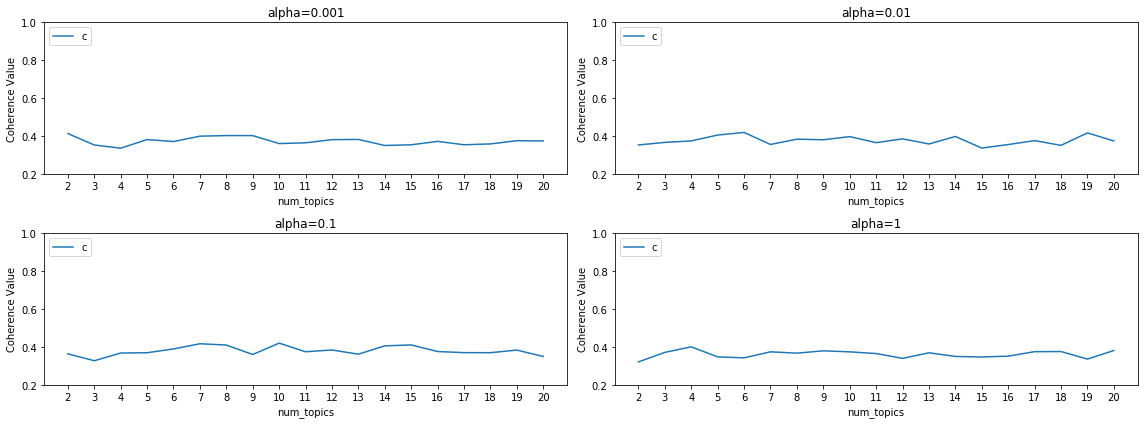

In [85]:
# plot


plot_coherence(coherence_df, alpha_range, num_topics_range)

In [95]:
# LDA Model

lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = id2word, num_topics = 5, random_state =100,
                                           update_every = 1, chunksize = 100, passes = 10, alpha = 1, per_word_topics = True)

In [96]:
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"get" + 0.022*"note" + 0.015*"say" + 0.014*"good" + 0.014*"fake" + '
  '0.013*"money" + 0.013*"people" + 0.011*"due" + 0.010*"modi" + '
  '0.009*"video"'),
 (1,
  '0.037*"find" + 0.033*"implement" + 0.031*"modi" + 0.031*"actually" + '
  '0.029*"poor" + 0.022*"dear" + 0.016*"effect" + 0.014*"question" + '
  '0.013*"watch" + 0.013*"rich"'),
 (2,
  '0.041*"impact" + 0.030*"system" + 0.030*"note" + 0.028*"overall" + '
  '0.028*"education" + 0.016*"late" + 0.015*"price" + 0.014*"rise" + '
  '0.014*"daily" + 0.014*"fall"'),
 (3,
  '0.051*"people" + 0.044*"support" + 0.017*"cash" + 0.016*"nation" + '
  '0.014*"move" + 0.013*"back" + 0.013*"run" + 0.013*"mode" + 0.012*"huge" + '
  '0.010*"create"'),
 (4,
  '0.050*"like" + 0.032*"digital" + 0.025*"payment" + 0.023*"growth" + '
  '0.020*"impact" + 0.016*"turn" + 0.016*"transaction" + 0.016*"catalyze" + '
  '0.014*"voucher" + 0.014*"food"')]


* Topic 0: impact,system, education, cash, price, fall and gold
* Topic 1: old, fake, note, ban and paytm
* Topic 2: Modi, support, people and poor
* Topic 3: Shortage, fund, daughter and mallyas
* Topic 4: Video, youtube, telangana, help, support and oppose

In [97]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.109675  0.153493       1        1  31.955826
1      0.169051 -0.069542       2        1  21.052677
4     -0.174591 -0.152510       3        1  19.347221
0      0.027982  0.067797       4        1  15.240452
3      0.087233  0.000762       5        1  12.403828, topic_info=          Term       Freq      Total Category  logprob  loglift
341       like  54.000000  54.000000  Default  30.0000  30.0000
110       find  45.000000  45.000000  Default  29.0000  29.0000
39      people  60.000000  60.000000  Default  28.0000  28.0000
159     impact  96.000000  96.000000  Default  27.0000  27.0000
104   actually  37.000000  37.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
252      still   3.791196  11.086025   Topic5  -5.2092   1.0142
154       give   3.597367   9.198278   Topic5  -5.2617   1.1484
41        poor   4.710580  42.757378   Topic5  -4.9921  -0.1186
79   implement   4.356223  44.062012   Topic5  -5.0703  -0.2268
168      money   3.936424  28.280182   Topic5  -5.1717   0.1153

[288 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
304       5  0.889917      acid
792       2  0.495980    action
792       4  0.495980    action
104       2  0.991783  actually
358       2  0.131110       add
...     ...       ...       ...
488       4  0.216083     worth
296       1  0.050668   youtube
296       2  0.152003   youtube
296       3  0.456009   youtube
296       4  0.354674   youtube

[451 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])